In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import pickle
import sys
from matplotlib import pyplot as plt


def load_dataset(batch_size, num_classes, epochs):
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    dataset = {
        'batch_size': batch_size,
        'num_classes': num_classes,
        'epochs': epochs,
        'x_train': x_train,
        'x_test': x_test,
        'y_train': y_train,
        'y_test': y_test
    }

    return dataset


def save_network(network):
    object_file = open(network.name + '.obj', 'wb')
    pickle.dump(network, object_file)


def load_network(name):
    object_file = open(name + '.obj', 'rb')
    return pickle.load(object_file)


def order_indexes(self):
    i = 0
    for block in self.block_list:
        block.index = i
        i += 1


def plot_training(history):
    plt.figure(figsize=[8, 6])
    plt.plot(history.history['loss'], 'r', linewidth=3.0)
    plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
    plt.xlabel('Epochs ', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.title('Loss Curves', fontsize=16)

    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_loss_plot.png')

    plt.figure(figsize=[8, 6])
    plt.plot(history.history['acc'], 'r', linewidth=3.0)
    plt.plot(history.history['val_acc'], 'b', linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
    plt.xlabel('Epochs ', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.title('Accuracy Curves', fontsize=16)

    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_acc_plot.png')
    plt.close()


def plot_statistics(stats):
    plt.figure(figsize=[8, 6])
    plt.plot([s[0] for s in stats], 'r', linewidth=3.0)
    plt.plot([stats[0][0]] * len(stats), 'b', linewidth=3.0)
    plt.legend(['BestFitness', 'InitialFitness'], fontsize=18)
    plt.xlabel('Generations', fontsize=16)
    plt.ylabel('FitnessValue', fontsize=16)
    plt.title('Fitness Curve', fontsize=16)
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_fitness_plot.png')

    plt.figure(figsize=[8, 6])
    plt.plot([s[1] for s in stats], 'r', linewidth=3.0)
    plt.plot([stats[0][1]] * len(stats), 'b', linewidth=3.0)
    plt.legend(['BestParamsNum', 'InitialParamsNum'], fontsize=18)
    plt.xlabel('Generations', fontsize=16)
    plt.ylabel('ParamsNum', fontsize=16)
    plt.title('Parameters Curve', fontsize=16)
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_params_plot.png')
    plt.close()

In [ ]:
import keras.layers
from random import randint


class Block:
	__slots__ = ('type', 'index', 'layerList1', 'layerList2')

	def __init__(self, type, index, layerList1, layerList2):
		self.type = type
		self.index = index
		self.layerList1 = layerList1
		self.layerList2 = layerList2

	def get_layers(self):
		return self.layerList1 + self.layerList2

	def get_size(self):
		return len(self.get_layers())


class Convolutional:
	# __slots__ = ('name', 'filters', 'padding', 'filter_size', 'stride_size', 'input_shape')

	def __init__(self, filters, padding, filter_size, stride_size, input_shape):
		self.name = 'Conv2D'
		self.filters = filters
		self.padding = padding
		self.filter_size = filter_size
		self.stride_size = stride_size
		self.input_shape = input_shape

	def build_layer(self, model):
		model.add(keras.layers.Conv2D(filters=self.filters,
									   kernel_size=self.filter_size,
									   strides=self.stride_size,
									   padding=self.padding,
									   activation='relu',
									   kernel_initializer='he_uniform',
									   input_shape=self.input_shape))

	def mutate_parameters(self):
		mutation = randint(0, 4)
		print("Mutating", self.name, "layer:")
		if mutation == 0 and self.filters >= 32:
			print("-->changed self.filters from ", self.filters, " ", end="")
			self.filters = int(self.filters / 2)
			print("to ", self.filters)
		elif mutation == 1 and self.filters >= 32:
			print("-->changed self.filters from ", self.filters, " ", end="")
			self.filters = int(self.filters / 2)
			print("to ", self.filters)
		elif mutation == 2 and self.filters <= 512:
			print("-->changed self.filters from ", self.filters, " ", end="")
			self.filters *= 2
			print("to ", self.filters)
		elif mutation == 3 and self.filters <= 512:
			print("-->changed self.filters from ", self.filters, " ", end="")
			self.filters *= 2
			print("to ", self.filters)
		elif mutation == 4:
			if self.padding == 'valid':
				print("-->changed self.padding from ", self.padding, " ", end="")
				self.padding = 'same'
				print("to ", self.padding)
			else:
				print("-->changed self.padding from ", self.padding, " ", end="")
				self.padding = 'valid'
				print("to ", self.padding)


'''
elif mutation is 4:
	print("changed self.stride_size from ", self.stride_size, " ", end="")
	self.stride_size = (self.stride_size[0] + 1, self.stride_size[1] + 1)
	print("to ", self.stride_size, " and ", end="")
	print("changed self.stride_size from ", self.stride_size, " ", end="")
	self.stride_size = (self.stride_size[0] + 1, self.stride_size[1] + 1)
	print("to ", self.stride_size)
'''


class Pooling:
	__slots__ = ('name', 'pool_size', 'stride_size', 'padding')

	def __init__(self, pool_size, stride_size, padding):
		self.name = 'MaxPooling2D'
		self.pool_size = pool_size
		self.stride_size = stride_size
		self.padding = padding

	def build_layer(self, model):
		if self.name == 'MaxPooling2D':
			model.add(keras.layers.MaxPooling2D(self.pool_size, self.stride_size, self.padding))
		elif self.name == 'AveragePooling2D':
			model.add(keras.layers.AveragePooling2D(self.pool_size, self.stride_size, self.padding))

	def mutate_parameters(self):
		print("Mutating", self.name, "layer:")
		mutation = randint(0, 1)
		if mutation == 0:
			if self.padding == 'valid':
				print("-->changed self.padding from ", self.padding, " ", end="")
				self.padding = 'same'
				print("to ", self.padding)
			else:
				print("-->changed self.padding from ", self.padding, " ", end="")
				self.padding = 'valid'
				print("to ", self.padding)
		elif mutation == 1:
			if self.name == 'MaxPooling2D':
				print("-->changed self.name from ", self.name, " ", end="")
				self.name = 'AveragePooling2D'
				print("to ", self.name)
			else:
				print("-->changed self.name from ", self.name, " ", end="")
				self.name = 'MaxPooling2D'
				print("to ", self.name)


'''
if mutation is 0:
	print("changed self.stride_size from ", self.stride_size, " ", end="")
	self.stride_size = (self.stride_size[0] + 1, self.stride_size[1] + 1)
	print("to ", self.stride_size)
'''


class FullyConnected:
	__slots__ = ('name', 'units', 'num_classes')

	def __init__(self, units, num_classes):
		self.name = "FullyConnected"
		self.units = units
		self.num_classes = num_classes

	def build_layer(self, model):
		model.add(keras.layers.Flatten())
		model.add(keras.layers.Dense(self.units, activation='relu', kernel_initializer='he_uniform'))
		model.add(keras.layers.Dense(self.num_classes, activation='softmax'))

	def mutate_parameters(self):
		print("Mutating", self.name, "layer:")
		mutation = randint(0, 2)
		if mutation == 0:
			print("-->changed self.units from ", self.units, " ", end="")
			self.units *= 2
			print("to ", self.units)
		elif mutation == 1:
			print("-->changed self.units from ", self.units, " ", end="")
			self.units *= 2
			print("to ", self.units)
		elif mutation == 2:
			print("-->changed self.units from ", self.units, " ", end="")
			self.units /= 2
			print("to ", self.units)


'''
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(self.num_classes, activation='softmax'))
'''


class Dropout:
	__slots__ = ('name', 'rate')

	def __init__(self, rate):
		self.name = "Dropout"
		self.rate = rate

	def build_layer(self, model):
		model.add(keras.layers.Dropout(self.rate))

	def mutate_parameters(self):
		print("Mutating", self.name, "layer:")
		mutation = randint(0, 3)
		if mutation == 0 and self.rate <= 0.85:
			print("-->changed self.rate from ", self.rate, " ", end="")
			self.rate = self.rate + 0.10
			print("to ", self.rate)
		elif mutation == 1 and self.rate <= 0.90:
			print("-->changed self.rate from ", self.rate, " ", end="")
			self.rate = self.rate + 0.05
			print("to ", self.rate)
		elif mutation == 2 and self.rate >= 0.15:
			print("-->changed self.rate from ", self.rate, " ", end="")
			self.rate = self.rate - 0.10
			print("to ", self.rate)
		elif mutation == 3 and self.rate >= 0.10:
			print("-->changed self.rate from ", self.rate, " ", end="")
			self.rate = self.rate - 0.05
			print("to ", self.rate)

In [ ]:
import tensorflow as tf
import os

from keras.callbacks import Callback

from keras.models import Sequential
from random import randint, choice
from copy import deepcopy


class Network:
    __slots__ = ('name', 'block_list', 'fitness', 'model')

    def __init__(self, it):
        self.name = 'parent_' + str(it) if it == 0 else 'net_' + str(it)
        self.block_list = []
        self.fitness = None
        self.model = None

    def build_model(self):
        model = Sequential()
        for block in self.block_list:
            for layer in block.get_layers():
                try:
                    layer.build_layer(model)
                except:
                    print("\nINDIVIDUAL ABORTED, CREATING A NEW ONE\n")
                    return -1
        return model

    def train_and_evaluate(self, model, dataset):
        print("Training", self.name)
        model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(dataset['x_train'],
                            dataset['y_train'],
                            batch_size=dataset['batch_size'],
                            epochs=dataset['epochs'],
                            validation_data=(dataset['x_test'], dataset['y_test']),
                            shuffle=True)

        self.model = model                                    # model
        self.fitness = history.history['val_loss'][-1]        # fitness

        print("SUMMARY OF", self.name)
        print(model.summary())
        print("FITNESS: ", self.fitness)

        model.save(self.name + '.h5')                       # save model
        save_network(self)                                  # save topology, model and fitness

    def asexual_reproduction(self, it, dataset):


        if os.path.isfile('net_' + str(it) + '.h5'):
            print("\n-------------------------------------")
            print("Loading individual net_" + str(it))
            print("--------------------------------------\n")
            individual = load_network('net_' + str(it))
            model = tf.keras.models.load_model(individual.name + '.h5')
            print("SUMMARY OF", individual.name)
            print(model.summary())
            print("FITNESS: ", individual.fitness)
            return individual


        individual = Network(it)

        print("\n-------------------------------------")
        print("\nCreating individual", individual.name)
        print("--------------------------------------\n")

        individual.block_list = deepcopy(self.block_list)           # copy the layer list from parent

        print("----->Strong Mutation")
        individual.block_mutation(dataset)                          # mutate a block
        individual.layer_mutation(dataset)                          # mutate a layer
        individual.parameters_mutation()                            # mutate some parameters

        model = individual.build_model()

        if model == -1:
            return self.asexual_reproduction(it, dataset)

        individual.train_and_evaluate(model, dataset)

        return individual

    def block_mutation(self, dataset):
        print("Block Mutation")

        print([(block.index, block.type) for block in self.block_list])

        # block list containing all the blocks with type = 1
        bl = [block.index for block in self.block_list if block.type == 1]

        if len(bl) == 0:
            print("Creating a new block with two Convolutional layers and a Pooling layer")
            self.block_list[1].index = 2
            layerList1 = [
                Convolutional(filters=pow(2, randint(5, 8)),
                              filter_size=(3, 3),
                              stride_size=(1, 1),
                              padding='same',
                              input_shape=dataset['x_train'].shape[1:]),
                Convolutional(filters=pow(2, randint(5, 8)),
                              filter_size=(3, 3),
                              stride_size=(1, 1),
                              padding='same',
                              input_shape=dataset['x_train'].shape[1:])
            ]
            layerList2 = [
                Pooling(pool_size=(2, 2),
                        stride_size=(2, 2),
                        padding='same')
            ]
            b = Block(1, 1, layerList1, layerList2)
            self.block_list.insert(1, b)
            return

        block_idx = randint(1, max(bl))         # pick a random block among all the blocks with type = 1
        block_type_idx = randint(0, 1)          # 1 -> Conv2D; 0 -> Pooling or Dropout
        mutation_type = randint(0, 1)           # 1 -> remove; 0 -> add

        # list of layers of the selected block
        layerList = self.block_list[block_idx].layerList1 if block_type_idx else self.block_list[block_idx].layerList2
        length = len(layerList)

        if mutation_type:                                       # remove
            if length == 1:
                del self.block_list[block_idx]
            elif block_type_idx:
                pos = randint(0, length - 1)
                print("Removing a Conv2D layer at", pos)
                del layerList[pos]
            else:
                pos = randint(0, length - 1)
                print("Removing a Pooling/Dropout layer at", pos)
                del layerList[pos]
        else:                                                   # add
            if block_type_idx:
                print("Inserting a Convolutional layer")
                layer = Convolutional(filters=pow(2, randint(5, 8)),
                                      filter_size=(3, 3),
                                      stride_size=(1, 1),
                                      padding='same',
                                      input_shape=dataset['x_train'].shape[1:])
                layerList.insert(randint(0, length - 1), layer)
            else:
                if randint(0, 1):                               # 1 -> Pooling; 0 -> Dropout
                    print("Inserting a Pooling layer")
                    layer = Pooling(pool_size=(2, 2),
                                    stride_size=(2, 2),
                                    padding='same')
                    layerList.insert(randint(0, length - 1), layer)
                else:
                    print("Inserting a Dropout layer")
                    rate = choice([0.15, 0.25, 0.35, 0.50])
                    layer = Dropout(rate=rate)
                    layerList.insert(randint(0, length - 1), layer)

    def layer_mutation(self, dataset):
        print("Layer Mutation")

        # pick a random block among all the blocks with type = 1
        bl = [block.index for block in self.block_list if block.type == 1]

        if len(bl) == 0:
            return

        block_idx = randint(1, max(bl))
        block_type_idx = randint(0, 1)      # 1 -> Conv2D; 0 -> Pooling or Dropout

        # list of layers of the selected block
        layerList = self.block_list[block_idx].layerList1 if block_type_idx else self.block_list[block_idx].layerList2

        if len(layerList) == 0:
            if block_type_idx:
                layer = Convolutional(filters=pow(2, randint(5, 8)),
                                      filter_size=(3, 3),
                                      stride_size=(1, 1),
                                      padding='same',
                                      input_shape=dataset['x_train'].shape[1:])
                self.block_list[block_idx].layerList1.append(layer)
                return
            else:
                layer = Pooling(pool_size=(2, 2),
                                stride_size=(2, 2),
                                padding='same')
                self.block_list[block_idx].layerList2.append(layer)

        idx = randint(0, len(layerList) - 1)
        layer = layerList[idx]

        if layer.name == 'Conv2D':
            print("Splitting Conv2D layer at index", idx)
            layer.filters = int(layer.filters * 0.5)
            layerList.insert(idx, deepcopy(layer))
        elif layer.name == 'MaxPooling2D' or layer.name == 'AveragePooling2D':
            print("Changing Pooling layer at index", idx, "with Conv2D layer")
            del layerList[idx]
            conv_layer = Convolutional(filters=pow(2, randint(5, 8)),
                                       filter_size=(3, 3),
                                       stride_size=(2, 2),
                                       padding=layer.padding,
                                       input_shape=dataset['x_train'].shape[1:])
            layerList.insert(idx, conv_layer)

    def parameters_mutation(self):
        print("Parameters Mutation")
        for block in self.block_list:
            for layer in block.get_layers():
                if randint(0, 1):
                    layer.mutate_parameters()

In [ ]:
import tensorflow as tf
import os


def compute_parent(dataset):
    if os.path.isfile('parent_0.h5'):
        daddy = load_network('parent_0')
        model = tf.keras.models.load_model('parent_0.h5')
        print("Loading parent_0")
        print("SUMMARY OF", daddy.name)
        print(model.summary())
        print("FITNESS:", daddy.fitness)
        return daddy

    daddy = Network(0)

    layerList1 = [
        Convolutional(filters=32, filter_size=(3, 3), stride_size=(1, 1), padding='same',
                      input_shape=dataset['x_train'].shape[1:]),
        Convolutional(filters=32, filter_size=(3, 3), stride_size=(1, 1), padding='valid',
                      input_shape=dataset['x_train'].shape[1:])
    ]
    layerList2 = [
        Pooling(pool_size=(2, 2), stride_size=(2, 2), padding='same')
    ]
    daddy.block_list.append(Block(0, 0, layerList1, layerList2))
    '''
    layerList1 = [
        Convolutional(filters=64, filter_size=(3, 3), stride_size=(1, 1), padding='same',
                      input_shape=dataset['x_train'].shape[1:]),
        Convolutional(filters=64, filter_size=(3, 3), stride_size=(1, 1), padding='valid',
                      input_shape=dataset['x_train'].shape[1:])
    ]
    layerList2 = [
        Pooling(pool_size=(2, 2), stride_size=(2, 2), padding='same'),
        Dropout(rate=0.25)
    ]
    daddy.block_list.append(Block(1, 1, layerList1, layerList2))

    layerList1 = [
        Convolutional(filters=128, filter_size=(3, 3), stride_size=(1, 1), padding='same',
                      input_shape=dataset['x_train'].shape[1:]),
        Convolutional(filters=128, filter_size=(3, 3), stride_size=(1, 1), padding='valid',
                      input_shape=dataset['x_train'].shape[1:])
    ]
    layerList2 = [
        Pooling(pool_size=(2, 2), stride_size=(2, 2), padding='same'),
        Dropout(rate=0.25)
    ]
    daddy.block_list.append(Block(1, 1, layerList1, layerList2))
    '''
    layerList1 = [
        FullyConnected(units=128, num_classes=dataset['num_classes'])
    ]
    layerList2 = []
    daddy.block_list.append(Block(2, 1, layerList1, layerList2))

    model = daddy.build_model()
    daddy.train_and_evaluate(model, dataset)
    return daddy

170498071/170498071 [==============================] - 2s 0us/step
Genetic Algorithm
----->Initializing Population
Training parent_0
Epoch 1/3
1563/1563 [==============================] - 13s 6ms/step - loss: 1.2799 - accuracy: 0.5477 - val_loss: 1.1457 - val_accuracy: 0.5956
Epoch 2/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8914 - accuracy: 0.6896 - val_loss: 0.9952 - val_accuracy: 0.6626
Epoch 3/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7014 - accuracy: 0.7576 - val_loss: 0.9955 - val_accuracy: 0.6842
SUMMARY OF parent_0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training net_1
Epoch 1/3
1563/1563 [==============================] - 11s 6ms/step - loss: 1.4578 - accuracy: 0.4768 - val_loss: 1.1428 - val_accuracy: 0.5861
Epoch 2/3
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0132 - accuracy: 0.6427 - val_loss: 0.9804 - val_accuracy: 0.6551
Epoch 3/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8264 - accuracy: 0.7123 - val_loss: 0.8522 - val_accuracy: 0.7074
SUMMARY OF net_1
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 average_pooling2d (Average  (None, 15, 15, 32)        0         
 Pooling2D)                                           

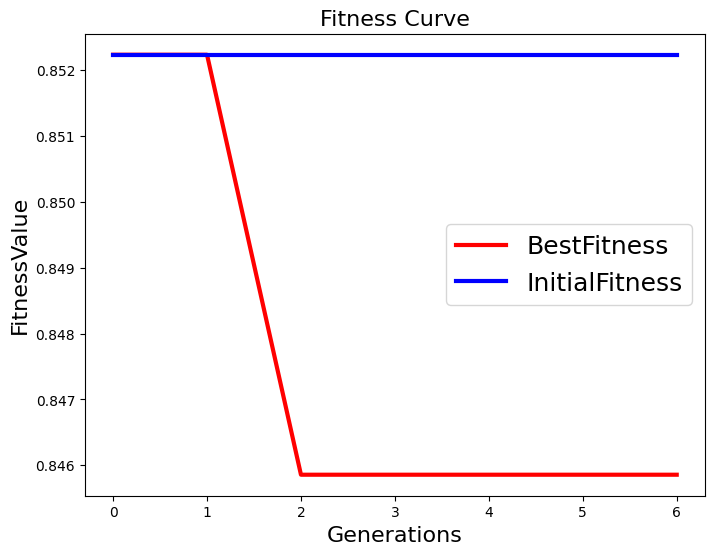

In [ ]:
import tensorflow as tf
import os
from random import randint, sample
from copy import deepcopy

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)      # suppress messages from Tensorflow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


def initialize_population(population_size, dataset):
    print("----->Initializing Population")
    daddy = compute_parent(dataset)                                 # load parent from input
    population = [daddy]
    for it in range(1, population_size):
        population.append(daddy.asexual_reproduction(it, dataset))

    # sort population on ascending order based on fitness
    return sorted(population, key=lambda cnn: cnn.fitness)


def selection(k, population, num_population):
    if k == 0:                                              # elitism selection
        print("----->Elitism selection")
        return population[0], population[1]
    elif k == 1:                                            # tournament selection
        print("----->Tournament selection")
        i = randint(0, num_population - 1)
        j = i
        while j < num_population - 1:
            j += 1
            if randint(1, 100) <= 50:
                return population[i], population[j]
        return population[i], population[0]
    else:                                                   # proportionate selection
        print("----->Proportionate selection")
        cum_sum = 0
        for i in range(num_population):
            cum_sum += population[i].fitness
        perc_range = []
        for i in range(num_population):
            count = 100 - int(100 * population[i].fitness / cum_sum)
            for j in range(count):
                perc_range.append(i)
        i, j = sample(range(1, len(perc_range)), 2)
        while i == j:
            i, j = sample(range(1, len(perc_range)), 2)
        return population[perc_range[i]], population[perc_range[j]]


def crossover(parent1, parent2, it):
    print("----->Crossover")
    child = Network(it)

    first, second = None, None
    if randint(0, 1):
        first = parent1
        second = parent2
    else:
        first = parent2
        second = parent1

    child.block_list = deepcopy(first.block_list[:randint(1, len(first.block_list) - 1)]) \
                       + deepcopy(second.block_list[randint(1, len(second.block_list) - 1):])

    order_indexes(child)                            # order the indexes of the blocks

    return child


def genetic_algorithm(num_population, num_generation, num_offspring, dataset):
    print("Genetic Algorithm")

    population = initialize_population(num_population, dataset)

    print("\n-------------------------------------")
    print("Initial Population:")
    for cnn in population:
        print(cnn.name, ': ', cnn.fitness)
    print("--------------------------------------\n")

    # for printing statistics about fitness and number of parameters of the best individual
    stats = [(population[0].fitness, population[0].model.count_params())]

    for gen in range(1, num_generation + 1):

        '''
            k is the selection parameter:
                k = 0 -> elitism selection
                k = 1 -> tournament selection
                k = 2 -> proportionate selection
        '''
        k = randint(0, 2)

        print("\n------------------------------------")
        print("Generation", gen)
        print("-------------------------------------")

        for c in range(num_offspring):

            print("\nCreating Child", c)

            parent1, parent2 = selection(k, population, num_population)                 # selection
            print("Selected", parent1.name, "and", parent2.name, "for reproduction")

            child = crossover(parent1, parent2, c + num_population)                     # crossover
            print("Child has been created")

            print("----->Soft Mutation")
            child.layer_mutation(dataset)                                               # mutation
            child.parameters_mutation()
            print("Child has been mutated")

            model = child.build_model()                                                 # evaluation

            while model == -1:
                child = crossover(parent1, parent2, c + num_population)
                child.block_mutation(dataset)
                child.layer_mutation(dataset)
                child.parameters_mutation()
                model = child.build_model()

            child.train_and_evaluate(model, dataset)

            if child.fitness < population[-1].fitness:                                  # evolve population
                print("----->Evolution: Child", child.name, "with fitness", child.fitness, "replaces parent ", end="")
                print(population[-1].name, "with fitness", population[-1].fitness)
                name = population[-1].name
                population[-1] = deepcopy(child)
                population[-1].name = name
                population = sorted(population, key=lambda net: net.fitness)
            else:
                print("----->Evolution: Child", child.name, "with fitness", child.fitness, "is discarded")

        stats.append((population[0].fitness, population[0].model.count_params()))

    print("\n\n-------------------------------------")
    print("Final Population")
    print("-------------------------------------\n")
    for cnn in population:
        print(cnn.name, ': ', cnn.fitness)

    print("\n-------------------------------------")
    print("Stats")
    for i in range(len(stats)):
        print("Best individual at generation", i + 1, "has fitness", stats[i][0], "and parameters", stats[i][1])
    print("-------------------------------------\n")

    # plot the fitness and the number of parameters of the best individual at each iteration
    plot_statistics(stats)

    return population[0]


def main():
    batch_size = 32                         # the number of training examples in one forward/backward pass
    num_classes = 10                        # number of cifar-10 dataset classes
    epochs = 3                              # number of forward and backward passes of all the training examples

    '''
        dataset contains the hyper parameters for loading data and the dataset:
            dataset = {
                'batch_size': batch_size,
                'num_classes': num_classes,
                'epochs': epochs,
                'x_train': x_train,
                'x_test': x_test,
                'y_train': y_train,
                'y_test': y_test
            }
    '''
    dataset = load_dataset(batch_size, num_classes, epochs)

    num_population = 5
    num_generation = 6
    num_offspring = 3

    # plot the best model obtained
    optCNN = genetic_algorithm(num_population, num_generation, num_offspring, dataset)

    # plot the training and validation loss and accuracy
    num_epoch = 3
    model = optCNN.build_model()
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(dataset['x_train'],
                        dataset['y_train'],
                        batch_size=dataset['batch_size'],
                        epochs=num_epoch,
                        validation_data=(dataset['x_test'], dataset['y_test']),
                        shuffle=True)
    optCNN.model = model                                        # model
    optCNN.fitness = history.history['val_loss'][-1]            # fitness

    print("\n\n-------------------------------------")
    print("The initial CNN has been evolved successfully in the individual", optCNN.name)
    print("-------------------------------------\n")
    daddy = load_network('parent_0')
    model = tf.keras.models.load_model('parent_0.h5')
    print("\n\n-------------------------------------")
    print("Summary of initial CNN")
    print(model.summary())
    print("Fitness of initial CNN:", daddy.fitness)

    print("\n\n-------------------------------------")
    print("Summary of evolved individual")
    print(optCNN.model.summary())
    print("Fitness of the evolved individual:", optCNN.fitness)
    print("-------------------------------------\n")

    # plot_training(history)


if __name__ == '__main__':
    main()